In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset from the Excel file
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Display the first few rows to understand the structure
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values and data types
print("\nDataset Info:")
print(data.info())

# Summary statistics to understand the distribution of numerical features
print("\nSummary Statistics:")
print(data.describe())

First 5 rows of the dataset:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  

Dataset Info:
<class 'panda

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming already loaded as 'data' from Step 1)
# Drop the 'ID#' column as it’s not relevant for clustering
data = data.drop('ID#', axis=1)

# Verify the columns after dropping
print("Columns after dropping ID#:", data.columns)

# Since cc1_miles, cc2_miles, cc3_miles are ordinal (1 to 5), we treat them as numerical
# Award? is binary (0 or 1), so it can also be treated as numerical
# No need for one-hot encoding unless we want to treat them as purely categorical

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to all columns (since all are numerical or ordinal/binary)
scaled_data = scaler.fit_transform(data)

# Convert scaled data back to a DataFrame for easier handling
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# Display the first few rows of scaled data
print("\nFirst 5 rows of scaled data:")
print(scaled_data.head())

# Check summary statistics of scaled data
print("\nSummary Statistics of scaled data:")
print(scaled_data.describe())

Columns after dropping ID#: Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

First 5 rows of scaled data:
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.791649          -0.328603        -0.362168           1.411920   
3 

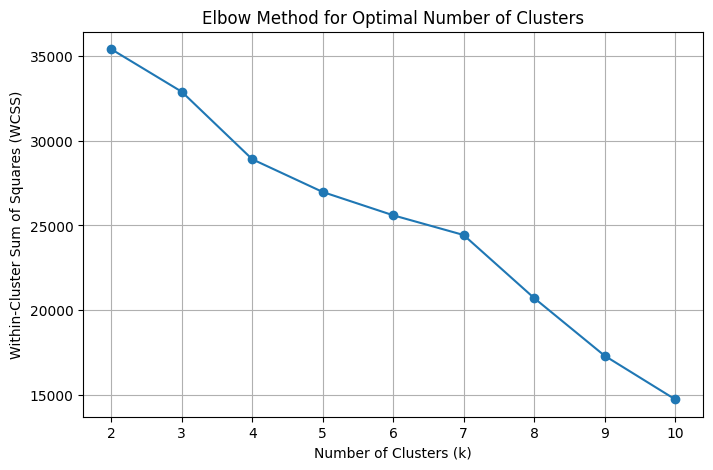

WCSS values for k=2 to k=10: [35409.51662986132, 32895.911014439516, 28909.47940043057, 26975.779233037058, 25599.269402878563, 24433.62444554321, 20713.28456478709, 17306.4400558425, 14732.229882347432]


In [3]:
# Import necessary libraries (only new ones needed)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize list to store WCSS values
wcss = []

# Test different numbers of clusters (k from 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Print WCSS values for reference
print("WCSS values for k=2 to k=10:", wcss)

In [4]:
# Import necessary library
from sklearn.cluster import KMeans

# Apply K-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the scaled dataset
scaled_data['Cluster'] = cluster_labels

# Add cluster labels to the original (unscaled) dataset for easier interpretation
data['Cluster'] = cluster_labels

# Display the first few rows with cluster assignments
print("First 5 rows with cluster labels (scaled data):")
print(scaled_data.head())

print("\nFirst 5 rows with cluster labels (original data):")
print(data.head())

# Display the count of passengers in each cluster
print("\nCluster Distribution:")
print(scaled_data['Cluster'].value_counts())

First 5 rows with cluster labels (scaled data):
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.791649          -0.328603        -0.362168           1.411920   
3    -1.104065          -0.328603        -0.362168           1.372208   
4     1.499394           1.154932         0.692490           1.363975   

     Award?  Cluster  
0 -0.766919        2  
1 -0.766919        2  
2 -0.

In [5]:
# Group the original data by cluster and calculate mean values
cluster_analysis = data.groupby('Cluster').mean()

# Display the mean values for each feature per cluster
print("Mean Values of Features by Cluster:")
print(cluster_analysis)

# Optionally, highlight key observations (e.g., high Balance or Award? usage)
# You can manually inspect the output to identify patterns

Mean Values of Features by Cluster:
               Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster                                                               
0         58124.779499  193.427890   1.699642   1.019070   1.000000   
1        139193.010702  145.376932   4.195006   1.002378   1.057075   
2         59918.329626   70.803842   1.495450   1.020222   1.001011   
3         34546.727656   93.012648   1.247049   1.011804   1.000000   
4        196333.680556  773.805556   2.250000   1.041667   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster                                                                  
0        10816.562574    10.760429         417.281287         1.258641   
1        51174.633769    20.095125         383.443520         1.166468   
2         6402.407482     8.601618         177.680485         0.528817   
3         4428.688027     6.623946         141.472175         0.424958   
4        33783.833333 

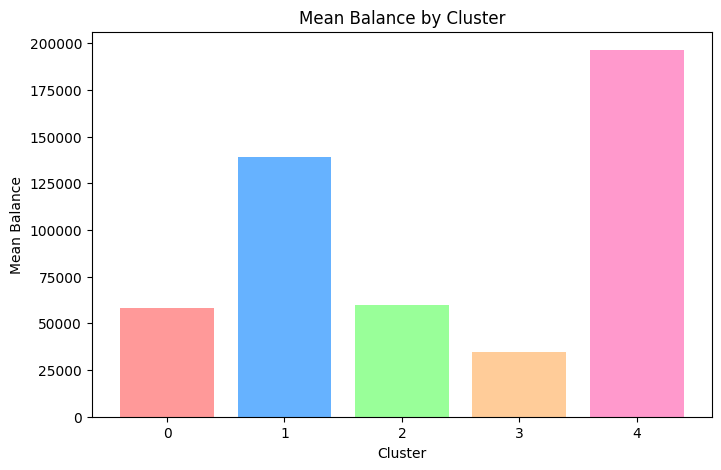

In [6]:
import matplotlib.pyplot as plt

# Plot mean Balance by cluster
plt.figure(figsize=(8, 5))
plt.bar(cluster_analysis.index, cluster_analysis['Balance'], color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'])
plt.title('Mean Balance by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Balance')
plt.show()